In [1]:
# !pip install nltk
# !pip install numpy
# !pip install pandas
# !pip install sklearn
# !pip install matplotlib
# !pip install emoji
# !pip install gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sklearn
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
import emoji
from nltk.stem.porter import PorterStemmer
from functools import reduce
import re

In [3]:
nltk.download()
stop_words = stopwords.words('english')
porter = PorterStemmer()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [4]:
df1 = pd.read_csv("./YouTube-Spam-Collection-v1/Youtube01-Psy.csv")
df2 = pd.read_csv("./YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv")

In [5]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/Users/chipanzeon/opt/anaconda3/envs/dm2/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


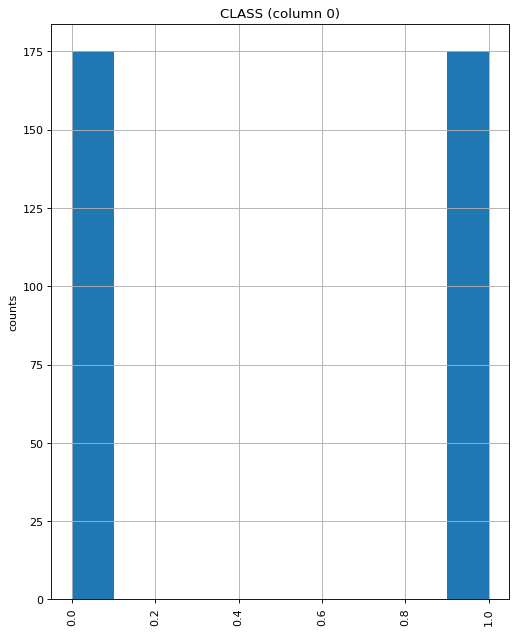

In [6]:
plotPerColumnDistribution(df1, 10, 5)

/Users/chipanzeon/opt/anaconda3/envs/dm2/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


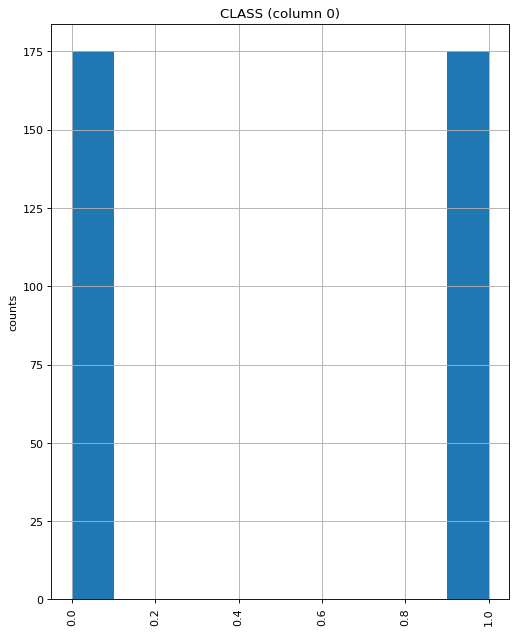

In [7]:
plotPerColumnDistribution(df2, 10, 5)

In [8]:
df1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [9]:
df2.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [10]:
## used for explore the dataset.
# vacabulary = set()
# sentences = []


# for index, row in df1.iterrows():
#     content = row['CONTENT'].strip()
#     content = content.replace("\ufeff","")
#     content = content.lower()
#     content = emoji.demojize(content) #delete emojis
#     content_new = "".join([char for char in content if char not in string.punctuation])
#     words = word_tokenize(content_new)
#     filtered_words = [word for word in words if word not in stop_words]
#     stemmed_words = [porter.stem(word) for word in filtered_words]    
#     for word in stemmed_words:
#         vacabulary.add(word)
#     sentences.append(content)
    
    
# for index, row in df2.iterrows():
#     content = row['CONTENT'].strip()
#     content = content.replace("\ufeff","")
#     content = content.lower()
#     content = emoji.demojize(content) #delete emojis
#     content_new = "".join([char for char in content if char not in string.punctuation])
#     words = word_tokenize(content_new)
#     filtered_words = [word for word in words if word not in stop_words]
#     stemmed_words = [porter.stem(word) for word in filtered_words]
#     for word in stemmed_words:
#         vacabulary.add(word)
#     sentences.append(content)

In [11]:
porter.stem("music")

'music'

In [12]:
frequent_attributes_name = ["check", "video", "song", "youtube", "like"
                            , "subscribe", "please", "love", "channel", "music"]

In [33]:
dict_for_df = {}
for attribute in frequent_attributes_name:
    dict_for_df[attribute] = []

dict_for_df["attrU"] = []
dict_for_df["attrH"] = []
dict_for_df["has_emoji"] = []
dict_for_df["attrL"] = []
dict_for_df["length"] = []
dict_for_df["CLASS"] = []

for index, row in df1.iterrows():
    content = row['CONTENT']
    content = content.replace("\ufeff","")
    content = content.lower()
    
    label = row["CLASS"]
    dict_for_df["CLASS"].append(int(label))
    
    if content.find("check") != -1:
        dict_for_df["check"].append(1)
    else:
        dict_for_df["check"].append(0)
        
    if content.find("video") != -1:
        dict_for_df["video"].append(1)
    else:
        dict_for_df["video"].append(0)
    
    if content.find("song") != -1:
        dict_for_df["song"].append(1)
    else:
        dict_for_df["song"].append(0)
    
    if content.find("youtube") != -1:
        dict_for_df["youtube"].append(1)
#         print("youtube")
    else:
        dict_for_df["youtube"].append(0)
        
    if content.find("like") != -1:
        dict_for_df["like"].append(1)
    else:
        dict_for_df["like"].append(0)
    
    if content.find("subscribe") != -1:
        dict_for_df["subscribe"].append(1)
    else:
        dict_for_df["subscribe"].append(0)
        
    if content.find("please") != -1:
        dict_for_df["please"].append(1)
    else:
        dict_for_df["please"].append(0)
        
    if content.find("love") != -1:
        dict_for_df["love"].append(1)
    else:
        dict_for_df["love"].append(0)
        
    if content.find("channel") != -1:
        dict_for_df["channel"].append(1)
    else:
        dict_for_df["channel"].append(0)
        
    if content.find("music") != -1:
        dict_for_df["music"].append(1)
    else:
        dict_for_df["music"].append(0)
    
    if (content.find("http://") != -1) or (content.find("https://") != -1):
        dict_for_df["attrU"].append(1)
    else:
        dict_for_df["attrU"].append(0)
    
    if re.findall("&(\w*);", content):
        dict_for_df["attrH"].append(1)
    else:
        dict_for_df["attrH"].append(0)
        
    if (re.findall("_face", content)) or (emoji.demojize(content) != content):
        dict_for_df["has_emoji"].append(1)
    else:
        dict_for_df["has_emoji"].append(0)
        
    dict_for_df["attrL"].append(len(content))
    
    content = emoji.demojize(content) #delete emojis
    content_new = "".join([char for char in content if char not in string.punctuation])
    words = word_tokenize(content_new)
    filtered_words = [word for word in words if word not in stop_words]
    dict_for_df["length"].append(len(filtered_words))
        

        
for index, row in df2.iterrows():
    content = row['CONTENT']
    content = content.replace("\ufeff","")
    content = content.lower()
    
    label = row["CLASS"]
    dict_for_df["CLASS"].append(int(label))
    
    if content.find("check") != -1:
        dict_for_df["check"].append(1)
    else:
        dict_for_df["check"].append(0)
        
    if content.find("video") != -1:
        dict_for_df["video"].append(1)
    else:
        dict_for_df["video"].append(0)
    
    if content.find("song") != -1:
        dict_for_df["song"].append(1)
    else:
        dict_for_df["song"].append(0)
    
    if content.find("youtube") != -1:
        dict_for_df["youtube"].append(1)
    else:
        dict_for_df["youtube"].append(0)
        
    if content.find("like") != -1:
        dict_for_df["like"].append(1)
    else:
        dict_for_df["like"].append(0)
    
    if content.find("subscribe") != -1:
        dict_for_df["subscribe"].append(1)
    else:
        dict_for_df["subscribe"].append(0)
        
    if content.find("please") != -1:
        dict_for_df["please"].append(1)
    else:
        dict_for_df["please"].append(0)
        
    if content.find("love") != -1:
        dict_for_df["love"].append(1)
    else:
        dict_for_df["love"].append(0)
        
    if content.find("channel") != -1:
        dict_for_df["channel"].append(1)
    else:
        dict_for_df["channel"].append(0)
        
    if content.find("music") != -1:
        dict_for_df["music"].append(1)
    else:
        dict_for_df["music"].append(0)
    
    if (content.find("http://") != -1) or (content.find("https://") != -1):
        dict_for_df["attrU"].append(1)
    else:
        dict_for_df["attrU"].append(0)
    
    if re.findall("&(\w*);", content):
        dict_for_df["attrH"].append(1)
    else:
        dict_for_df["attrH"].append(0)
        
    if (re.findall("_face", content)) or (emoji.demojize(content) != content):
        dict_for_df["has_emoji"].append(1)
    else:
        dict_for_df["has_emoji"].append(0)
    
    dict_for_df["attrL"].append(len(content))
    
    content = emoji.demojize(content) #delete emojis
    content_new = "".join([char for char in content if char not in string.punctuation])
    words = word_tokenize(content_new)
    filtered_words = [word for word in words if word not in stop_words]
    dict_for_df["length"].append(len(filtered_words))
        
df = pd.DataFrame(data=dict_for_df)
# for k, v in dict_for_df.items():
#     print (k, len(v))

In [34]:
df

,check,video,song,youtube,like,subscribe,please,love,channel,music,attrU,attrH,has_emoji,attrL,length,CLASS
0,1,0,0,0,0,0,0,0,1,0,0,0,0,56,6,1
1,1,0,0,0,1,1,1,0,1,0,0,0,0,166,18,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,38,3,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,47,5,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,38,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,1,0,0,0,0,0,0,0,0,0,0,94,7,0
696,0,0,0,0,0,0,0,0,0,0,0,1,0,5,1,0
697,0,1,1,1,0,0,1,0,0,0,0,0,0,438,45,1
698,0,0,1,0,0,0,0,0,0,0,0,0,0,194,23,0


In [35]:
#split training validation and test set
from sklearn.model_selection import train_test_split

data = df.iloc[:, 0 : 15].values
label = df.iloc[:, 15].values
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)


In [36]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

est_AttrL = KBinsDiscretizer(n_bins=3, encode='ordinal')
est_AttrL.fit(X_train[:, 13].reshape(-1, 1))
Xt = est_AttrL.transform(X_train[:, 13].reshape(-1, 1))
enc_AttrL = OneHotEncoder(handle_unknown='ignore')
enc_AttrL.fit_transform(Xt)
mat1 = enc_AttrL.transform(Xt).toarray()

est_Length = KBinsDiscretizer(n_bins=3, encode='ordinal')
est_Length.fit(X_train[:, 14].reshape(-1, 1))
Xt = est_Length.transform(X_train[:, 14].reshape(-1, 1))
enc_Length = OneHotEncoder(handle_unknown='ignore')
enc_Length.fit_transform(Xt)
mat2 = enc_Length.transform(Xt).toarray()

Xtest = est_AttrL.transform(X_test[:, 13].reshape(-1, 1))
mat1_test = enc_AttrL.transform(Xtest).toarray()

Xtest = est_Length.transform(X_test[:, 13].reshape(-1, 1))
mat2_test = enc_Length.transform(Xtest).toarray()

In [37]:
X_train = np.concatenate((X_train[:, 0:13], mat1, mat2), axis=1)
X_test = np.concatenate((X_test[:, 0:13], mat1_test, mat2_test), axis=1)


In [38]:
X_test.shape

(140, 19)

In [39]:
#Use linear model (logistic regression) as baseline
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.metrics import f1_score

clf_Log_Reg = LogisticRegression(random_state=0, penalty="l1", solver="liblinear").fit(X_train, y_train)
predictions = clf_Log_Reg.predict(X_test)
print('Accuracy：', accuracy_score(y_test, predictions))
print('Precision：', precision_score(y_test, predictions))
print('Recall：', recall_score(y_test, predictions))
print('F1-score：', f1_score(y_test, predictions))
print('Confusion Matrix：\n', confusion_matrix(y_test, predictions))

Accuracy： 0.8642857142857143
Precision： 0.8571428571428571
Recall： 0.8695652173913043
F1-score： 0.8633093525179856
Confusion Matrix：
 [[61 10]
 [ 9 60]]


In [20]:
clf_Log_Reg.coef_

array([[ 2.58650671,  0.4449934 , -0.28508116,  0.        ,  0.        ,
         4.46544808,  2.51545778,  0.        ,  4.26662219,  0.        ,
         4.59316686,  0.9455867 , -0.44791572, -0.94537144, -0.84175735,
         0.        ,  0.        , -0.79484086, -0.49865977]])

In [27]:
print(sklearn.__version__)
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 3, 4, 5, 6],
             'n_estimators': [1000]}

base_estimator = RandomForestClassifier(random_state=0)


sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2,
                         max_resources=30).fit(X_train, y_train)
sh.best_estimator_


1.0.1


RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)

In [28]:
randomForestClassifier = RandomForestClassifier(random_state=0, max_depth=5, min_samples_split=3, n_estimators=1000)

In [29]:
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=1000,
                       random_state=0)

In [30]:
predictions = randomForestClassifier.predict(X_test)
print('Accuracy：', accuracy_score(y_test, predictions))
print('Precision：', precision_score(y_test, predictions))
print('Recall：', recall_score(y_test, predictions))
print('F1-score：', f1_score(y_test, predictions))
print('Confusion Matrix：\n', confusion_matrix(y_test, predictions))

Accuracy： 0.8857142857142857
Precision： 0.9206349206349206
Recall： 0.8405797101449275
F1-score： 0.8787878787878787
Confusion Matrix：
 [[66  5]
 [11 58]]


In [25]:
randomForestClassifier.feature_importances_

array([0.07524771, 0.0065871 , 0.01363951, 0.00261211, 0.00484502,
       0.13700541, 0.11984143, 0.0072939 , 0.13713888, 0.00508305,
       0.37022524, 0.01629954, 0.00487664, 0.02325   , 0.00804012,
       0.04000761, 0.01173132, 0.00745797, 0.00881744])

#### The random forest perform better than Logistic Regression model

#### Test file "Youtube04-Eminem.csv".

In [32]:
df3 = pd.read_csv("./YouTube-Spam-Collection-v1/Youtube04-Eminem.csv")

In [40]:
dict_for_df = {}
for attribute in frequent_attributes_name:
    dict_for_df[attribute] = []

dict_for_df["attrU"] = []
dict_for_df["attrH"] = []
dict_for_df["has_emoji"] = []
dict_for_df["attrL"] = []
dict_for_df["length"] = []
dict_for_df["CLASS"] = []

for index, row in df1.iterrows():
    content = row['CONTENT']
    content = content.replace("\ufeff","")
    content = content.lower()
    
    label = row["CLASS"]
    dict_for_df["CLASS"].append(int(label))
    
    if content.find("check") != -1:
        dict_for_df["check"].append(1)
    else:
        dict_for_df["check"].append(0)
        
    if content.find("video") != -1:
        dict_for_df["video"].append(1)
    else:
        dict_for_df["video"].append(0)
    
    if content.find("song") != -1:
        dict_for_df["song"].append(1)
    else:
        dict_for_df["song"].append(0)
    
    if content.find("youtube") != -1:
        dict_for_df["youtube"].append(1)
#         print("youtube")
    else:
        dict_for_df["youtube"].append(0)
        
    if content.find("like") != -1:
        dict_for_df["like"].append(1)
    else:
        dict_for_df["like"].append(0)
    
    if content.find("subscribe") != -1:
        dict_for_df["subscribe"].append(1)
    else:
        dict_for_df["subscribe"].append(0)
        
    if content.find("please") != -1:
        dict_for_df["please"].append(1)
    else:
        dict_for_df["please"].append(0)
        
    if content.find("love") != -1:
        dict_for_df["love"].append(1)
    else:
        dict_for_df["love"].append(0)
        
    if content.find("channel") != -1:
        dict_for_df["channel"].append(1)
    else:
        dict_for_df["channel"].append(0)
        
    if content.find("music") != -1:
        dict_for_df["music"].append(1)
    else:
        dict_for_df["music"].append(0)
    
    if (content.find("http://") != -1) or (content.find("https://") != -1):
        dict_for_df["attrU"].append(1)
    else:
        dict_for_df["attrU"].append(0)
    
    if re.findall("&(\w*);", content):
        dict_for_df["attrH"].append(1)
    else:
        dict_for_df["attrH"].append(0)
        
    if (re.findall("_face", content)) or (emoji.demojize(content) != content):
        dict_for_df["has_emoji"].append(1)
    else:
        dict_for_df["has_emoji"].append(0)
        
    dict_for_df["attrL"].append(len(content))
    
    content = emoji.demojize(content) #delete emojis
    content_new = "".join([char for char in content if char not in string.punctuation])
    words = word_tokenize(content_new)
    filtered_words = [word for word in words if word not in stop_words]
    dict_for_df["length"].append(len(filtered_words))
df_test = pd.DataFrame(data=dict_for_df)

In [45]:
X_train, y_train = df.iloc[:, 0:15].values, df.iloc[:, 15].values
X_test, y_test = df_test.iloc[:, 0 : 15].values, df_test.iloc[:, 15].values

est_AttrL = KBinsDiscretizer(n_bins=3, encode='ordinal')
est_AttrL.fit(X_train[:, 13].reshape(-1, 1))
Xt = est_AttrL.transform(X_train[:, 13].reshape(-1, 1))
enc_AttrL = OneHotEncoder(handle_unknown='ignore')
enc_AttrL.fit_transform(Xt)
mat1 = enc_AttrL.transform(Xt).toarray()

est_Length = KBinsDiscretizer(n_bins=3, encode='ordinal')
est_Length.fit(X_train[:, 14].reshape(-1, 1))
Xt = est_Length.transform(X_train[:, 14].reshape(-1, 1))
enc_Length = OneHotEncoder(handle_unknown='ignore')
enc_Length.fit_transform(Xt)
mat2 = enc_Length.transform(Xt).toarray()

Xtest = est_AttrL.transform(X_test[:, 13].reshape(-1, 1))
mat1_test = enc_AttrL.transform(Xtest).toarray()

Xtest = est_Length.transform(X_test[:, 13].reshape(-1, 1))
mat2_test = enc_Length.transform(Xtest).toarray()

X_train = np.concatenate((X_train[:, 0:13], mat1, mat2), axis=1)
X_test = np.concatenate((X_test[:, 0:13], mat1_test, mat2_test), axis=1)

In [46]:
randomForestClassifier = RandomForestClassifier(random_state=0, max_depth=5, min_samples_split=3, n_estimators=1000)
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=1000,
                       random_state=0)

In [47]:
predictions = randomForestClassifier.predict(X_test)
print('Accuracy：', accuracy_score(y_test, predictions))
print('Precision：', precision_score(y_test, predictions))
print('Recall：', recall_score(y_test, predictions))
print('F1-score：', f1_score(y_test, predictions))
print('Confusion Matrix：\n', confusion_matrix(y_test, predictions))

Accuracy： 0.8971428571428571
Precision： 0.9371069182389937
Recall： 0.8514285714285714
F1-score： 0.8922155688622755
Confusion Matrix：
 [[165  10]
 [ 26 149]]
